## Separate priors per dimension

In [2]:
import hmc_tomography
import numpy

Create an empty 4d target

In [3]:
target = hmc_tomography.Targets.Empty(4)

Create prior 1, a L0.5-like distribution

In [4]:
prior_1 = hmc_tomography.Priors.L05(
    1,
    lower_bounds=-10 * numpy.ones((1, 1)),
    upper_bounds=10 * numpy.ones((1, 1)),
    dispersion=1,
)

Create prior 2, a 1d normal distribution with mu = 0, sigma = 4, upper truncated at 10

In [5]:
prior_2 = hmc_tomography.Priors.Normal(
    1,
    means=numpy.zeros((1, 1)),
    covariance=4 * numpy.ones((1, 1)),
    upper_bounds=10 * numpy.ones((1, 1)),
)

Create prior 3, a 2d normal distribution with loc = 0, dispersion = 1, truncated between -4 and 4

In [6]:
prior_3 = hmc_tomography.Priors.Sparse(
    2,
    lower_bounds=-4 * numpy.ones((2, 1)),
    upper_bounds=4 * numpy.ones((2, 1)),
    dispersion=1,
)

Combine the priors

In [7]:
prior = hmc_tomography.Priors.CompositePrior(4, [prior_1, prior_2, prior_3])

Create a unit mass matrix

In [8]:
mass_matrix = hmc_tomography.MassMatrices.Unit(4)

Create the sampler object and sample

In [9]:
sampler = hmc_tomography.Samplers.HMC(target, mass_matrix, prior)
filename = "samples_composite.h5"
sampler.sample(filename, proposals=10000, online_thinning=1, time_step=0.9);

Tot. acc rate: 0.32. Last 100 acc rate: 0.26. Progress:   7%|▋         | 7109/100000 [00:12<02:49, 548.87it/s]


Visualize

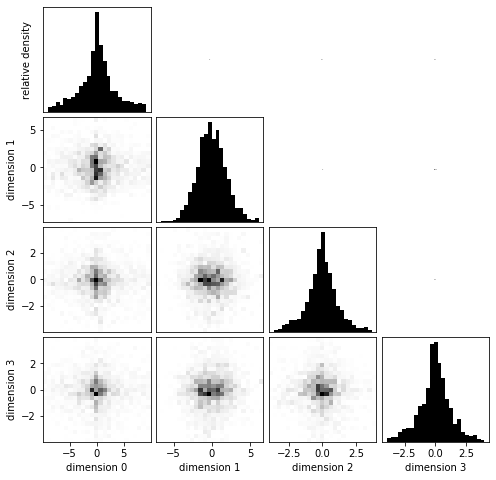

In [10]:
with hmc_tomography.Post.Samples(filename) as samples:
    hmc_tomography.Post.Visualization.marginal_grid(samples, [0, 1, 2, 3], show=True)